<a href="https://colab.research.google.com/github/lightituphome/Wine-Quality-Random-Forest-Classifier-/blob/main/winequality(Random_Forest_Classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
files.upload()

Saving winequality.csv to winequality.csv


{'winequality.csv': b'fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5\n7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5\n7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5\n11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5\n7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5\n7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4,5\n7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7\n7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7\n7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5\n6.7,0.58,0.08,1.8,0.09699999999999999,15.0,65.0,0.9959,3.28,0.54,9.2,5\n7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5\n5.6,0.615,0.0,1.6,0.08900000000000001,16.0,59.0,0.9943,3.58,0.52,9.9,5\n7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5\n8.9

In [ ]:
wine=pd.read_csv('winequality.csv')

In [ ]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
wine.shape

(1599, 12)

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visualisation

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: xlabel='quality', ylabel='count'>

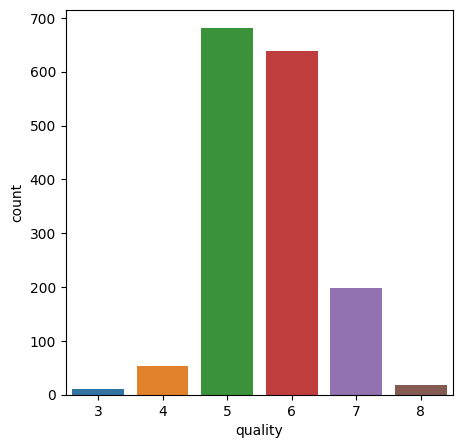

In [ ]:
plot=plt.figure(figsize=(5,5))
sns.countplot(x='quality',data=wine)

<Axes: xlabel='quality', ylabel='citric acid'>

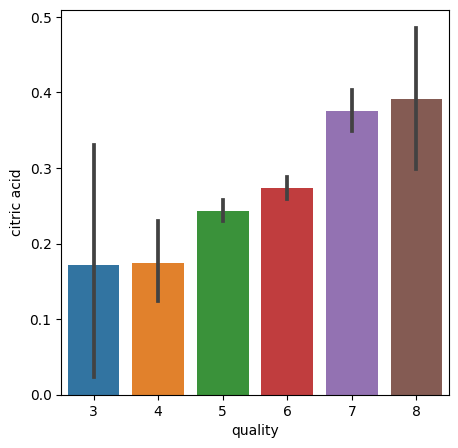

In [ ]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wine)

Correlation

In [ ]:
correlation=wine.corr()

<Axes: >

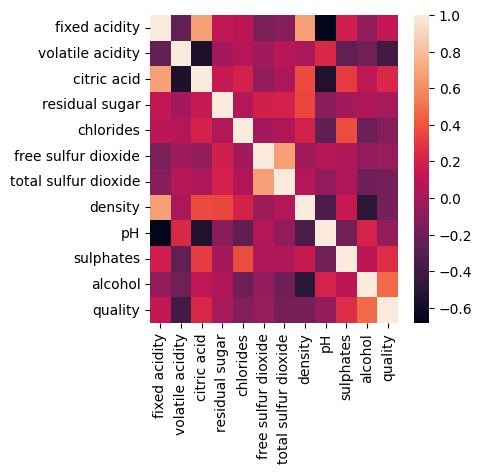

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(wine.corr())

Data Preprocessing

In [ ]:
x=wine.drop('quality',axis=1)

In [ ]:
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

label binarization

In [ ]:
y=wine['quality'].apply(lambda y_value:1 if y_value>= 7 else 0)

In [ ]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [ ]:
wine.value_counts('quality')

quality
5    681
6    638
7    199
4     53
8     18
3     10
dtype: int64

train and test split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [ ]:
print(x_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1031            7.3             0.550         0.01             1.8      0.093   
1364            7.2             0.605         0.02             1.9      0.096   
649             6.7             0.420         0.27             8.6      0.068   
276             6.9             0.540         0.04             3.0      0.077   
792             7.1             0.610         0.02             2.5      0.081   
...             ...               ...          ...             ...        ...   
524             9.2             0.430         0.49             2.4      0.086   
1024            7.7             0.580         0.01             1.8      0.088   
1445            7.4             0.785         0.19             5.2      0.094   
1035           10.1             0.370         0.34             2.4      0.085   
141             8.3             0.715         0.15             1.8      0.089   

      free sulfur dioxide  

In [ ]:
print(y_train)

1031    1
1364    0
649     0
276     0
792     0
       ..
524     0
1024    1
1445    0
1035    1
141     0
Name: quality, Length: 1279, dtype: int64


Model training:Random Forest Classifier

In [ ]:
model=RandomForestClassifier()

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier()

Model Evaluation

Accuracy Score

In [ ]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [ ]:
print('accuracy on training data:',training_data_accuracy)

accuracy on training data: 1.0


In [ ]:
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [ ]:
print('accuracy on testing data:',test_data_accuracy)

accuracy on testing data: 0.94375


Building a predictive system

In [ ]:
input_data=(7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)
input_data_as_numpy_array=np.array(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(prediction)

[0]


In [ ]:
if(prediction[0]==1):
  print("Good quality wine")
else:
  print("Bad quality wine")

Bad quality wine
